In [1]:
# SOurce ; https://www.kaggle.com/code/ashutoshvarma/image-classification-using-svm-92-accuracy

In [2]:
import os

__author__ = 'Y H'

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    %matplotlib inline
    import matplotlib.cm as cm
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE

import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import load_img

from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Dall E Datasets
Dall_E = '/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/'

calm_dall_e = os.listdir('/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/calm/')
nervous_dall_e = os.listdir('/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/uncalm/')

number_files_calm_dall_e = len(calm_dall_e)
number_files_nervous_dall_e = len(nervous_dall_e)

print ('Calm ; ', number_files_calm_dall_e) #504, At the beginning
print ('Uncalm ; ', number_files_nervous_dall_e) #504 , At the beginning

Calm ;  511
Uncalm ;  511


In [5]:
input_path_dall_e = []
label_dall_e = []
Dall_E = '/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/'

for class_name in os.listdir(Dall_E):
  for path in os.listdir('/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/' + class_name):
    if class_name == 'uncalm':
      label_dall_e.append(1)
    else:
      label_dall_e.append(0)
    input_path_dall_e.append(os.path.join('/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/', class_name, path))

print(input_path_dall_e[1], label_dall_e[1])
print(input_path_dall_e[-1], label_dall_e[-1])
#column name of the sheet
df_dalle=pd.DataFrame(list(zip(input_path_dall_e,label_dall_e )),columns=['images',"label "])
#change the file of exccl sheet
df_dalle.to_csv("//content/drive/MyDrive/Binary Classification Learn Dataset/20230601 All datasets Dall E.csv")

/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/uncalm/DALL·E 2023-03-09 20.07.42 - visual geometric structure as a drawing in black and white that makes you Nervous .png 1
/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/calm/DALL·E 2023-04-12 22.30.57 - a black and white design consisting of precise geometric shapes that inspires a feeling calmness.png 0


In [6]:
len(input_path_dall_e) #1008 images

1022

In [7]:
len(label_dall_e) #output 1008 images

1022

In [8]:
print(input_path_dall_e)
print(label_dall_e)

['/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/uncalm/DALL·E 2023-03-09 20.07.36 - visual geometric structure as a drawing in black and white that makes you Nervous  - Copy.png', '/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/uncalm/DALL·E 2023-03-09 20.07.42 - visual geometric structure as a drawing in black and white that makes you Nervous .png', '/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/uncalm/DALL·E 2023-03-09 20.10.53 - visual geometric structure as a drawing in black and white that makes you Nervous  - Copy.png', '/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/uncalm/DALL·E 2023-03-09 20.11.48 - visual geometric structure as a drawing in black and white that makes you Nervous .png', '/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/uncalm/DALL·E 2023-03-09 20.02.36 - visual inorganic structure as a drawing in black and white that makes you Nervous  - Copy.png', '/conten

In [9]:
import pandas as pd
df_dall_e = pd.DataFrame()
df_dall_e['images'] = input_path_dall_e
df_dall_e['label'] = label_dall_e
df_dall_e = df_dall_e.sample(frac=1).reset_index(drop=True)
df_dall_e.tail()

,images,label
1017,/content/drive/MyDrive/Binary Classification L...,1
1018,/content/drive/MyDrive/Binary Classification L...,0
1019,/content/drive/MyDrive/Binary Classification L...,0
1020,/content/drive/MyDrive/Binary Classification L...,1
1021,/content/drive/MyDrive/Binary Classification L...,0


In [10]:
import pandas as pd
df_dalle = pd.DataFrame()
df_dalle['images'] = input_path_dall_e
df_dalle['label'] = label_dall_e
df_dalle = df_dalle.sample(frac=1).reset_index(drop=True)
df_dalle.tail()

,images,label
1017,/content/drive/MyDrive/Binary Classification L...,0
1018,/content/drive/MyDrive/Binary Classification L...,1
1019,/content/drive/MyDrive/Binary Classification L...,1
1020,/content/drive/MyDrive/Binary Classification L...,0
1021,/content/drive/MyDrive/Binary Classification L...,0


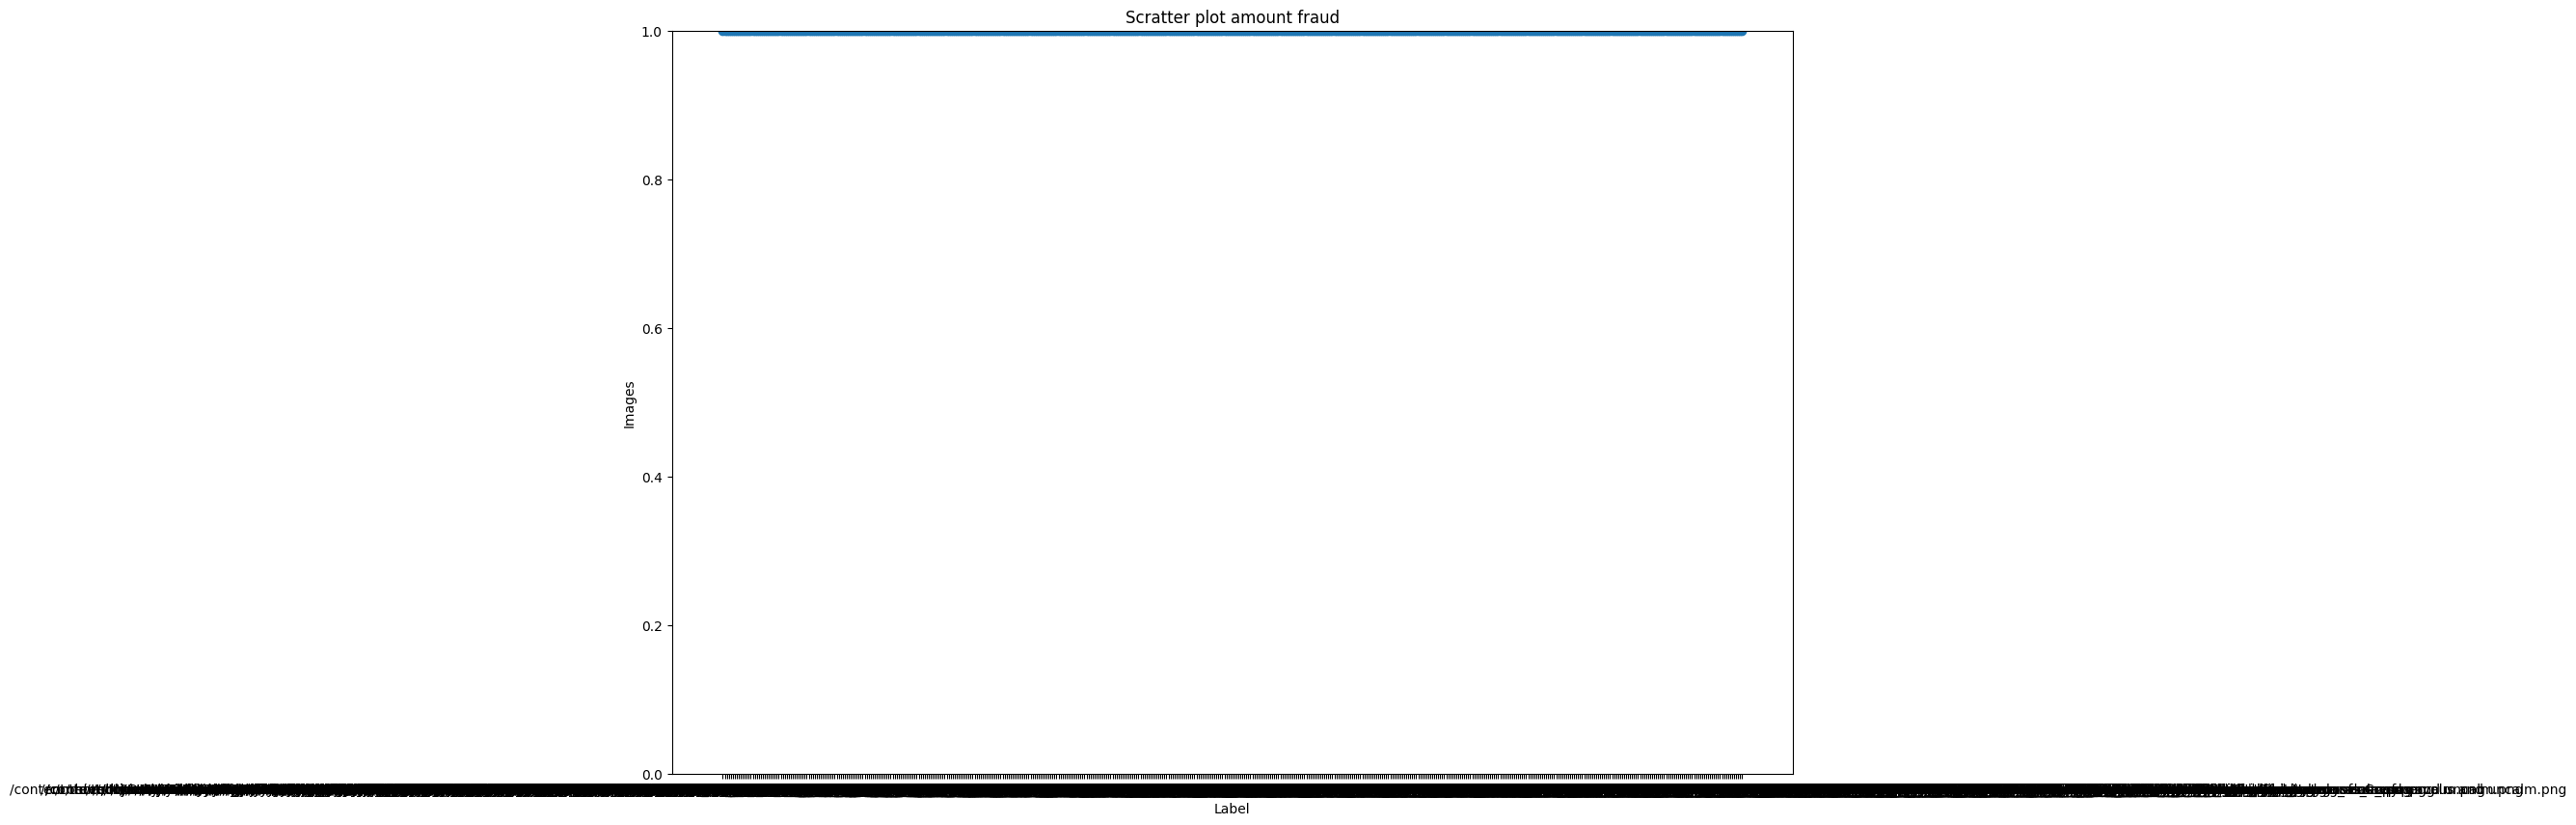

In [11]:
df_fraud = df_dalle[df_dalle['label'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['images'],df_fraud['label'] ) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Label')
plt.ylabel('Images')
#plt.xlim([0,175000])
plt.ylim([0,1])
plt.show()

[Text(0, 0, '511'), Text(0, 0, '511')]

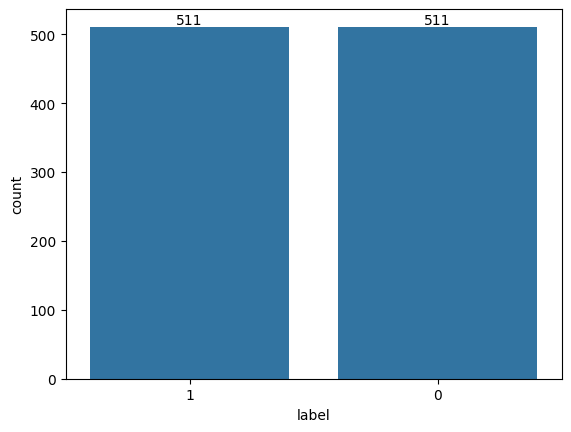

In [12]:
import seaborn as sns
ax_dall_e = sns.countplot(x=df_dall_e['label'],
                   order=df_dall_e['label'].value_counts(ascending=False).index);

abs_values_dall_e = df_dall_e['label'].value_counts(ascending=False).values

ax_dall_e.bar_label(container=ax_dall_e.containers[0], labels=abs_values_dall_e)

#Balance datasets - 504 & 504

In [13]:
df_dall_e['label'] = df_dall_e['label'].astype('str')

In [14]:
train_dall_e, test_dall_e = train_test_split(df_dall_e, test_size = 0.2, random_state = 2023)

In [15]:
train_dall_e.head()

,images,label
416,/content/drive/MyDrive/Binary Classification L...,1
880,/content/drive/MyDrive/Binary Classification L...,1
715,/content/drive/MyDrive/Binary Classification L...,1
496,/content/drive/MyDrive/Binary Classification L...,0
130,/content/drive/MyDrive/Binary Classification L...,1


In [16]:
train_dall_e.shape

(817, 2)

In [17]:
test_dall_e.shape

(205, 2)

In [18]:
test_dall_e.head()

,images,label
448,/content/drive/MyDrive/Binary Classification L...,1
49,/content/drive/MyDrive/Binary Classification L...,0
425,/content/drive/MyDrive/Binary Classification L...,0
765,/content/drive/MyDrive/Binary Classification L...,0
493,/content/drive/MyDrive/Binary Classification L...,1


In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.svm import SVC
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [20]:
DATADIR = '/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/'
CATEGORIES = ['calm','uncalm']
IMG_SIZE=224

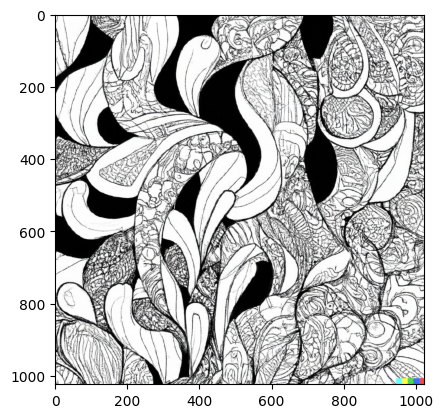

In [21]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [22]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [23]:
print(len(training_data))

1022


In [24]:
lenofimage = len(training_data)

In [25]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# CNN Preprocess

In [26]:
# Split data into train and validation sets
#train_set, val_set = train_test_split(train_df, test_size=0.2, random_state=42)
train_dall_e, test_dall_e = train_test_split(df_dalle, test_size = 0.2, random_state = 42)

# Define image data generator with augmentation
datagen_train = ImageDataGenerator(
    rotation_range=90,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input
)

datagen_val = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input
)

In [27]:
# Set image input size and batch size
img_size = (224, 224)
batch_size = 128
train_dall_e['label'] = train_dall_e['label'].astype('str')
test_dall_e['label'] = test_dall_e['label'].astype('str')

# Create train and validation generators
train_gen = datagen_train.flow_from_dataframe(
    train_dall_e,
    x_col='images',
    y_col='label',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    seed=42
)

Found 817 validated image filenames belonging to 2 classes.


In [28]:
val_gen = datagen_val.flow_from_dataframe(
    test_dall_e,
    x_col='images',
    y_col='label',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 205 validated image filenames belonging to 2 classes.


In [29]:
labels = {
    'calm': 0,
    'uncalm': 1
          }

In [30]:
'''# Create the model
model_cnn_lpf = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='tanh', input_shape=(224, 224, 3),activity_regularizer=Regularizer, kernel_regularizer=Regularizer),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='tanh', activity_regularizer=Regularizer, kernel_regularizer=Regularizer),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='tanh', activity_regularizer=Regularizer, kernel_regularizer=Regularizer),
    tf.keras.layers.AveragePooling2D(),
    #tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='tanh'),
    #tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu', activity_regularizer=Regularizer,kernel_regularizer='l2'),
    #tf.keras.layers.Dense(32, activation='relu', activity_regularizer=Regularizer,kernel_regularizer='l2'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
opt = keras.optimizers.Adam(learning_rate=0.0005)
model_cnn_lpf.compile(loss='binary_crossentropy',
              optimizer= opt,
              metrics=['accuracy'])

model_cnn_lpf.summary()'''

"# Create the model\nmodel_cnn_lpf = tf.keras.models.Sequential([\n    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='tanh', input_shape=(224, 224, 3),activity_regularizer=Regularizer, kernel_regularizer=Regularizer),\n    tf.keras.layers.AveragePooling2D(),\n    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='tanh', activity_regularizer=Regularizer, kernel_regularizer=Regularizer),\n    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),\n    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='tanh', activity_regularizer=Regularizer, kernel_regularizer=Regularizer),\n    tf.keras.layers.AveragePooling2D(),\n    #tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='tanh'),\n    #tf.keras.layers.AveragePooling2D(),\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dropout(0.2),\n    tf.keras.layers.Dense(128, activation='relu', activity_regularizer=Regularizer,kernel_regularizer='l2'),\n    #tf.keras.layers

In [31]:
# Define CNN model
cnn_model = keras.models.Sequential([
    keras.applications.ResNet50(
        include_top=False,
        input_shape=img_size + (3,),
        pooling='avg',
        weights='imagenet'
    ),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

94765736/94765736 [==============================] - 5s 0us/step


In [32]:
'''from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D, AveragePooling2D, Dropout, GlobalAveragePooling2D, Conv2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2, l1

Regularizer = l2(0.0001)'''

'from tensorflow import keras\nfrom tensorflow.keras import layers\nfrom tensorflow.python.keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D, AveragePooling2D, Dropout, GlobalAveragePooling2D, Conv2D\nfrom tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.optimizers import Adam\nfrom tensorflow.keras import regularizers\nfrom tensorflow.keras.regularizers import l2, l1\n\nRegularizer = l2(0.0001)'

In [33]:
# Compile the model
opt = keras.optimizers.Adam(learning_rate=0.000015)
cnn_model.compile(loss='binary_crossentropy',
              optimizer= opt,
              metrics=['accuracy'])

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 24584193 (93.78 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
             ModelCheckpoint("model.h5", verbose = 2, save_best_only = True)
             ]

In [35]:
# Define callbacks for early stopping and saving best model
callbacks = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    mode='min'
)

checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Colab Notebooks/chekpoint CNN.h5',
    save_best_only=True,
    monitor='val_loss',
    mode='min'
)

In [36]:
#Kalau udah ditrain diatas, apakah ini train ulang ataukah hanya epoch ulang tanpa tau data awal ?
history_cnn = cnn_model.fit(
    train_gen,
    epochs=3,
    shuffle = True,
    validation_data=val_gen,
    callbacks = callbacks,
    verbose=2)

Epoch 1/3
7/7 - 99s - loss: 0.7166 - accuracy: 0.5838 - val_loss: 0.6101 - val_accuracy: 0.6878 - 99s/epoch - 14s/step
Epoch 2/3
7/7 - 45s - loss: 0.5518 - accuracy: 0.7050 - val_loss: 0.5460 - val_accuracy: 0.7317 - 45s/epoch - 6s/step
Epoch 3/3
7/7 - 40s - loss: 0.4832 - accuracy: 0.7760 - val_loss: 0.5157 - val_accuracy: 0.7512 - 40s/epoch - 6s/step


In [37]:
# Define CNN model
cnn_model_true = keras.models.Sequential([
    keras.applications.ResNet50(
        include_top=True,
        input_shape=img_size + (3,),
        pooling='avg',
        weights='imagenet'
    ),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

102967424/102967424 [==============================] - 5s 0us/step


In [38]:
# Compile the model
opt = keras.optimizers.Adam(learning_rate=0.000015)
cnn_model_true.compile(loss='binary_crossentropy',
              optimizer= opt,
              metrics=['accuracy'])

cnn_model_true.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 dense_2 (Dense)             (None, 512)               512512    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 26149737 (99.75 MB)
Trainable params: 26096617 (99.55 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [ ]:
#Kalau udah ditrain diatas, apakah ini train ulang ataukah hanya epoch ulang tanpa tau data awal ?
history_cnn = cnn_model_true.fit(
    train_gen,
    epochs=150,
    shuffle = True,
    validation_data=val_gen,
    callbacks = callbacks,
    verbose=2)

Epoch 1/150
7/7 - 77s - loss: 0.6933 - accuracy: 0.5006 - val_loss: 0.6950 - val_accuracy: 0.3951 - 77s/epoch - 11s/step
Epoch 2/150
7/7 - 42s - loss: 0.6922 - accuracy: 0.5679 - val_loss: 0.6946 - val_accuracy: 0.4000 - 42s/epoch - 6s/step
Epoch 3/150
7/7 - 41s - loss: 0.6909 - accuracy: 0.6022 - val_loss: 0.6938 - val_accuracy: 0.4439 - 41s/epoch - 6s/step
Epoch 4/150
7/7 - 43s - loss: 0.6906 - accuracy: 0.5998 - val_loss: 0.6930 - val_accuracy: 0.4585 - 43s/epoch - 6s/step
Epoch 5/150
7/7 - 49s - loss: 0.6894 - accuracy: 0.6744 - val_loss: 0.6921 - val_accuracy: 0.4927 - 49s/epoch - 7s/step
Epoch 6/150
7/7 - 41s - loss: 0.6881 - accuracy: 0.7001 - val_loss: 0.6911 - val_accuracy: 0.5415 - 41s/epoch - 6s/step
Epoch 7/150
7/7 - 43s - loss: 0.6870 - accuracy: 0.7185 - val_loss: 0.6902 - val_accuracy: 0.5415 - 43s/epoch - 6s/step
Epoch 8/150
7/7 - 41s - loss: 0.6868 - accuracy: 0.7160 - val_loss: 0.6894 - val_accuracy: 0.5951 - 41s/epoch - 6s/step
Epoch 9/150
7/7 - 40s - loss: 0.6844 - 

In [ ]:
# Save the model
cnn_model_true.save('Resnet freeze unfreeze_model.h5')

In [ ]:
acc_cnn = history_cnn.history['accuracy']
loss_cnn = history_cnn.history['loss']

val_acc_cnn = history_cnn.history['val_accuracy']
val_loss_cnn = history_cnn.history['val_loss']

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1)
plt.plot(range(119), acc_cnn, label = 'Training Accuracy')
plt.plot(range(119), val_acc_cnn, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('ResNet50 Transfer Learning Training and Validation Accuracy')

plt.subplot(1, 3, 3)
plt.plot(range(119), loss_cnn, label = 'Training Loss')
plt.plot(range(119), val_loss_cnn, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('ResNet50 Transfer Learning Training and Validation Loss')

In [ ]:
_, acc = cnn_model_true.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

In [ ]:
print(test_acc)